In [1]:
import os
import sys
import time

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 8.0)


import numpy as np
import cv2


from crnn_predictor import lstm_ocr_model


In [2]:
if True:

    json_path = 'model/crnn_ctc-symbol.json'
    param_path = 'model/crnn_ctc-0019.params'
    num_label = 9 # Set your max length of label, add one more for blank
    batch_size = 1
    num_hidden = 256
    num_lstm_layer = 2
    data_shape = (100, 32)
    classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", 
        "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
    classes = classes[:10]
    _lstm_ocr_model = lstm_ocr_model(json_path, param_path, classes, data_shape, batch_size, 
                                    num_label, num_hidden, num_lstm_layer)
    

(80, 170, 3)
time:0.127


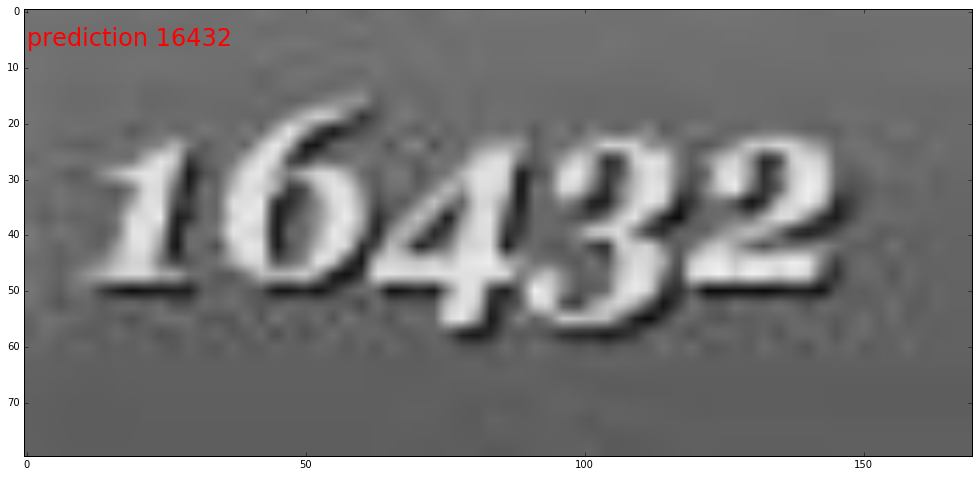

In [3]:
if True:
    img = cv2.imread('/world/data-c1/censhusheng/TestData/game/7.jpg',0)
    img = cv2.resize(img, (img.shape[1]*80/img.shape[0], 80))
    #img = cv2.blur(img, (3, 3))
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    #img = cv2.imread('data/test/text/2322.jpg')
        
    print img.shape
    #img = cv2.bitwise_not(img)
    
    t0 = time.time()
    _str = _lstm_ocr_model.forward_ocr(img)
    print("time:%.3f"%(time.time() - t0))

    plt.imshow(img)
    plt.gca().text(0, 6,
                    '{:s} {:s}'.format("prediction", _str),
                    #bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                    fontsize=24, color='red')
    plt.show()

In [ ]:
import time
from IPython import display

for i in range(1,800):
    display.clear_output(wait=True)
    im = cv2.imread('data/test/text/%d.jpg'%(i*50))
    plt.imshow(im[:,:,::-1]);plt.show()